In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/data base/healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df.shape

(5110, 12)

In [11]:
df.drop(['id'],axis=1,inplace=True)

In [13]:
print('number of dublicate rows:',df.duplicated().sum())

number of dublicate rows: 0


In [15]:
df.isnull().sum().sort_values(ascending=False)

,0
bmi,201
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
smoking_status,0


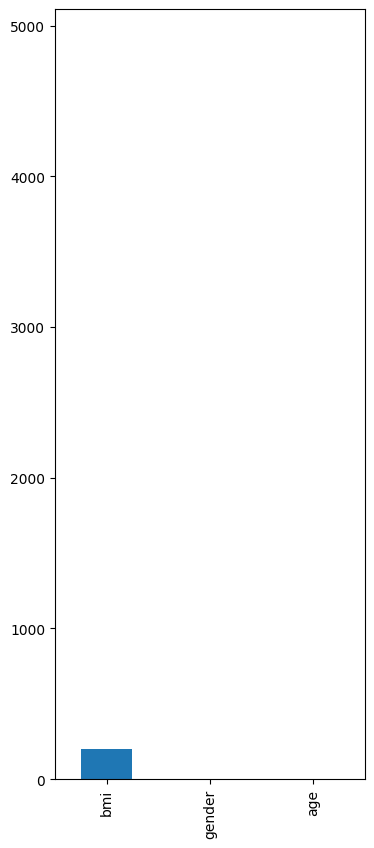

In [20]:
plt.figure(figsize=(4,10))
df.isnull().sum().sort_values(ascending = False).head(3).plot(kind='bar')
plt.ylim(0,df.shape[0])
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df['work_type'].head()

,work_type
0,Private
1,Self-employed
2,Private
3,Private
4,Self-employed


In [24]:
for col in ['Residence_type','avg_glucose_level','smoking_status']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'name of column {col} is : ',df[col].unique())

number of column Residence_type is :  2
name of column Residence_type is :  ['Urban' 'Rural']
number of column avg_glucose_level is :  3979
name of column avg_glucose_level is :  [228.69 202.21 105.92 ...  82.99 166.29  85.28]
number of column smoking_status is :  4
name of column smoking_status is :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [26]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
lb=LabelEncoder()

lb.fit(df['avg_glucose_level'])
df['avg_glucose_level'] = lb.transform(df['avg_glucose_level'])


df['avg_glucose_level'] = lb.fit_transform(df['avg_glucose_level'])
df['work_type'] = lb.fit_transform(df['work_type'])


In [32]:
df['work_type']

,work_type
0,2
1,3
2,2
3,2
4,3
...,...
5105,2
5106,3
5107,3
5108,2


In [33]:
feature_names = lb.classes_
print("Feature names before encoding:", feature_names)

Feature names before encoding: [0 1 2 3 4]


In [34]:
df['avg_glucose_level'].unique()

array([3850, 3588, 2483, ..., 1314, 3363, 1454])

In [38]:
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(df[['gender']]).toarray()
X.shape

(5110, 3)

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,2,Urban,3850,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,3,Rural,3588,NaN,never smoked,1
2,Male,80.0,0,1,Yes,2,Rural,2483,32.5,never smoked,1
3,Female,49.0,0,0,Yes,2,Urban,3385,34.4,smokes,1
4,Female,79.0,1,0,Yes,3,Rural,3394,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,2,Urban,1360,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,3,Urban,3030,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,3,Rural,1314,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,2,Rural,3363,25.6,formerly smoked,0


In [40]:
onehotencoder.categories_[0]

array(['Female', 'Male', 'Other'], dtype=object)

In [41]:
df.head

<bound method NDFrame.head of       gender   age  hypertension  heart_disease ever_married  work_type  \
0       Male  67.0             0              1          Yes          2   
1     Female  61.0             0              0          Yes          3   
2       Male  80.0             0              1          Yes          2   
3     Female  49.0             0              0          Yes          2   
4     Female  79.0             1              0          Yes          3   
...      ...   ...           ...            ...          ...        ...   
5105  Female  80.0             1              0          Yes          2   
5106  Female  81.0             0              0          Yes          3   
5107  Female  35.0             0              0          Yes          3   
5108    Male  51.0             0              0          Yes          2   
5109  Female  44.0             0              0          Yes          0   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban               3850  36.6  formerly smoked       1  
1             Rural               3588   NaN     never smoked       1  
2             Rural               2483  32.5     never smoked       1  
3             Urban               3385  34.4           smokes       1  
4             Rural               3394  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban               1360   NaN     never smoked       0  
5106          Urban               3030  40.0     never smoked       0  
5107          Rural               1314  30.6     never smoked       0  
5108          Rural               3363  25.6  formerly smoked       0  
5109          Urban               1454  26.2          Unknown       0  

[5110 rows x 11 columns]>

In [44]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(X)

In [45]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(0.0, 1.0)